Возьмём датасет - Отзывы на фильмы с сайта IMDB (https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), в которых для каждого отзыва поставлена семантическая оценка - "позитивный" или "негативный".

### Анализ тональности - процесс определения эмоциональной окраски текста, то есть является ли он положительным, отрицательным или нейтральным.

- >Можем выделить блоки, такие как:
- Импорт необходимых библиотек и загрузка набора данных
- Предварительная обработка текста, включая удаление знаков препинания, приведение к нижнему регистру, удаление стоп-слов и лемматизация
- Векторизация текста, используя мешок слов или TF-IDF
- Разделение данных на обучающую и тестовую выборки
- Обучение и оценка различных моделей машинного обучения
- Визуализация результатов, используя матрицу ошибок и кривые ROC

In [ ]:
# Устанавливаем библиотеку, если у кого не установлена
#pip install nltk

#### 1. Начальный импорт необходимых библиотек и загрузка набора данных, далее библиотеки будут отмечены в шаге кода ниже

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import nltk # импорт модуля nltk, который содержит инструменты для работы с естественным языком
from nltk.corpus import stopwords # импорт списка стоп-слов из модуля nltk

In [6]:
# Импорт необходимых модулей
from sklearn.feature_extraction.text import TfidfVectorizer # импорт класса TfidfVectorizer из модуля sklearn.feature_extraction.text, который позволяет преобразовать текст в векторы с весами, основанными на частоте термов и обратной частоте документов
from sklearn.linear_model import LinearRegression, LogisticRegression # импорт классов LinearRegression и LogisticRegression из модуля sklearn.linear_model, которые позволяют обучать линейные модели регрессии и классификации соответственно
from sklearn.model_selection import train_test_split # импорт функции train_test_split из модуля sklearn.model_selection, которая позволяет разбить данные на обучающую и тестовую выборки
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, auc # импорт функций mean_squared_error, accuracy_score, confusion_matrix, roc_curve и auc из модуля sklearn.metrics, которые позволяют оценивать качество моделей по разным метрикам
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot под именем plt, который позволяет строить графики и визуализировать данные


#### 2. Загрузка датасета

In [7]:
# Загрузка набора данных IMDB
data = pd.read_csv("IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# Выводим размерность объекта DataFrame
data.shape

(50000, 2)

In [9]:
# Вызываем метод value_counts() на столбце sentiment объекта DataFrame df
# Этот метод возвращает серию, содержащую частоту каждого уникального значения в столбце
# Результатом будет серия с индексом из значений столбца sentiment и значениями из их частот
data.sentiment.value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

"позитивные" и "негативные" отзывы разделены на  25000 - поровну

In [10]:
# Получаем уникальные значения столбца "sentiment" в датафрейме data
# Это позволяет узнать, какие эмоции были выражены в текстах
data["sentiment"].unique()


array(['positive', 'negative'], dtype=object)

In [11]:
# Преобразуем столбец "sentiment" в датафрейме data в множество
# Это позволяет убрать повторяющиеся значения и получить упорядоченный набор эмоций
print(set(data["sentiment"]))

{'negative', 'positive'}


In [12]:
# Выберем все примеры с положительным настроением
positive_examples = data[data['sentiment'] == 'positive']

# Выведем первые 5 примеров
print(positive_examples.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive


#### 3. Предобработка данных
Прежде, чем перейти к ML, текст необходимо предобработать.

Предварительная обработка текста, включая удаление знаков препинания, приведение к нижнему регистру, удаление стоп-слов и лемматизация

In [13]:
# Загружаем список стоп-слов для английского языка
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Выводим количество стоп-слов и первые 10 из них
print(f"Количество стоп-слов: {len(stop_words)}")
print(f"Первые 10 стоп-слов: {stop_words[:10]}")

Количество стоп-слов: 179
Первые 10 стоп-слов: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kolin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Создаем токенизатор WordPunctTokenizer из библиотеки nltk
word_tokenizer = nltk.WordPunctTokenizer()
# Применяем токенизатор 
tokens = word_tokenizer.tokenize('One of the other reviewers has mentioned that ...')
print(tokens)

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', '...']


In [15]:
# Создаем токенизатор WordPunctTokenizer из библиотеки nltk
word_tokenizer = nltk.WordPunctTokenizer()

# Применяем токенизатор к каждому обзору в датасете
data['tokens'] = data['review'].apply(word_tokenizer.tokenize)

# Выводим первые 5 строк датасета для проверки
print(data.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                              tokens  
0  [One, of, the, other, reviewers, has, mentione...  
1  [A, wonderful, little, production, ., <, br, /...  
2  [I, thought, this, was, a, wonderful, way, to,...  
3  [Basically, there, ', s, a, family, where, a, ...  
4  [Petter, Mattei, ', s, ", Love, in, the, Time,...  


- Создаем функцию words_only, которая принимает текст, извлекает из него только слова на английском языке, приводит их к нижнему регистру и возвращает их в виде одной строки. 
- Затем используем функцию на примере строки 'To be, or not to be: that is the question!!! 2023 year'

In [16]:
# Импортируем модуль re, который позволяет работать с регулярными выражениями
import re

# Создаем регулярное выражение, которое соответствует только буквам английского алфавита
# Регулярное выражение состоит из двух частей: [A-Za-z] и [-]
# Первая часть означает, что мы ищем любую букву в верхнем или нижнем регистре
# Вторая часть означает, что мы также ищем дефис
# Знак + означает, что мы ищем одну или более повторений предыдущего символа или группы символов
regex = re.compile(r'[A-Za-z-]+')

# Определяем функцию words_only, которая принимает текст и регулярное выражение в качестве аргументов
# По умолчанию мы используем регулярное выражение, которое мы создали выше
def words_only(text, regex=regex):
    # Используем конструкцию try-except, чтобы обработать возможные ошибки
    try:
        # Используем метод findall, чтобы найти все совпадения регулярного выражения в тексте
        # Этот метод возвращает список строк, которые соответствуют регулярному выражению
        # Используем метод join, чтобы объединить элементы списка в одну строку, разделяя их пробелами
        # Используем метод lower, чтобы привести все буквы к нижнему регистру
        return " ".join(regex.findall(text)).lower()
    # Если произошла ошибка, возвращаем пустую строку
    except:
        return ""

# Пример использования функции
# Передаем строку 'To be, or not to be: that is the question!!! 2024 year' в качестве аргумента функции words_only
# Функция возвращает строку 'to be or not to be that is the question year', которую мы выводим на экран с помощью функции print
print(words_only('To be, or not to be: that is the question!!! 2024 year'))


to be or not to be that is the question year


Найдем стоп слова

In [17]:
# Импортируем модуль collections, который содержит полезные структуры данных
from collections import Counter
# Импортируем модуль nltk, который предоставляет инструменты для обработки текстов
from nltk.tokenize import word_tokenize

# Определяем функцию get_most_common_words, которая принимает список текстов и число n в качестве аргументов
def get_most_common_words(texts, n=100):
    # Создаем пустой список all_words, в котором будем хранить все слова из текстов
    all_words = []
    # Проходимся по каждому тексту в списке texts
    for text in texts:
        # Используем функцию word_tokenize, чтобы разбить текст на отдельные слова
        words = word_tokenize(text)
        # Добавляем полученный список слов в список all_words с помощью метода extend
        all_words.extend(words)
    # Используем класс Counter, чтобы подсчитать, сколько раз каждое слово встречается в списке all_words
    # Метод most_common возвращает список кортежей, содержащих слова и их частоты, отсортированный по убыванию частоты
    # Аргумент n означает, сколько наиболее частых слов мы хотим получить
    most_common_words = Counter(all_words).most_common(n)
    # Возвращаем список most_common_words из функции
    return most_common_words

# Использование функции
# Передаем столбец 'review' из датафрейма data в качестве аргумента функции get_most_common_words
# Функция возвращает список из 100 наиболее частых слов и их частот, которые мы сохраняем в переменную most_common_words
most_common_words = get_most_common_words(data['review'])
# Выводим значение переменной most_common_words на экран с помощью функции print
print(most_common_words)

[('the', 573398), (',', 544030), ('.', 467982), ('and', 309118), ('a', 309103), ('of', 285087), ('to', 263658), ('is', 214740), ('/', 202455), ('>', 202250), ('<', 202094), ('br', 201948), ('in', 173139), ('I', 163294), ('it', 151931), ('that', 137744), ("'s", 121768), ('this', 120442), ('was', 99090), ('The', 87819), ('as', 85000), ('with', 84743), ('movie', 83813), ('for', 82594), ('film', 75940), (')', 71268), ('(', 69585), ('but', 68864), ("''", 66435), ("n't", 65930), ('``', 65695), ('on', 64621), ('you', 61807), ('are', 59379), ('not', 57052), ('have', 56188), ('his', 54573), ('be', 52361), ('!', 49164), ('he', 48041), ('one', 47091), ('at', 43361), ('by', 42842), ('an', 41376), ('all', 41242), ('who', 40615), ('they', 38718), ('from', 38646), ('like', 37671), ('It', 35619), ('so', 34311), ('or', 34011), ('about', 33544), ('has', 33431), ('her', 33007), ('just', 32829), ('out', 32374), ('?', 32338), ('do', 31115), ('This', 29208), ('some', 28489), ('good', 27582), ('more', 27193)

In [18]:
# Импорт модуля string для работы со знаками пунктуации
import string

# Задаем список наиболее часто встречающихся слов
most_common_words = [('the', 573398), (',', 544030), ('.', 467982), ('and', 309118), ('a', 309103), ('of', 285087), ('to', 263658), ('is', 214740), ('/', 202455), ('>', 202250), ('<', 202094), ('br', 201948), ('in', 173139), ('I', 163294), ('it', 151931), ('that', 137744), ("'s", 121768), ('this', 120442), ('was', 99090), ('The', 87819), ('as', 85000), ('with', 84743), ('movie', 83813), ('for', 82594), ('film', 75940), (')', 71268), ('(', 69585), ('but', 68864), ("''", 66435), ("n't", 65930), ('``', 65695), ('on', 64621), ('you', 61807), ('are', 59379), ('not', 57052), ('have', 56188), ('his', 54573), ('be', 52361), ('!', 49164), ('he', 48041), ('one', 47091), ('at', 43361), ('by', 42842), ('an', 41376), ('all', 41242), ('who', 40615), ('they', 38718), ('from', 38646), ('like', 37671), ('It', 35619), ('so', 34311), ('or', 34011), ('about', 33544), ('has', 33431), ('her', 33007), ('just', 32829), ('out', 32374), ('?', 32338), ('do', 31115), ('This', 29208), ('some', 28489), ('good', 27582), ('more', 27193), ('very', 26369), ('would', 26132), ('what', 25393), ('there', 24958), ('up', 24006), ('can', 23422), ('when', 23162), ('time', 22947), ('if', 22903), ('which', 22767), ('really', 22267), ('had', 22228), ('only', 22109), ('their', 22055), ('were', 21898), ('see', 21865), ('even', 21703), ('she', 21693), ('story', 21622), ('no', 21013), ('my', 20614), ('me', 20400), ('did', 20297), ('does', 19823), ("'", 19781), ('...', 19745), (':', 19414), ('-', 19294), ('than', 19122), ('much', 18455), ('been', 18206), ('could', 18198), ('get', 17823), ('into', 17726), ('will', 17298), ('other', 17291), ('we', 17085)]

# Создаем список стоп-слов из 10 самых встречающихся слов, исключая знаки пунктуации
stop_words = [word for word, _ in most_common_words if word not in string.punctuation][:10]

print(stop_words)


['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'I', 'it']


Расширим список стоп-слов, словами, которые являются стоп-словами в данной задаче. Удаляем знаки пунктуации и токенизируем

In [19]:
# Импортируем модуль re, который позволяет работать с регулярными выражениями
import re
# Импортируем модуль nltk, который предоставляет инструменты для обработки текстов
import nltk
# Импортируем подмодуль stopwords из модуля nltk.corpus, который содержит списки стоп-слов для разных языков
from nltk.corpus import stopwords
# Импортируем класс WordPunctTokenizer из модуля nltk.tokenize, который позволяет разбивать текст на слова с учетом пунктуации
from nltk.tokenize import WordPunctTokenizer
# Импортируем модуль tqdm, который позволяет отображать прогресс выполнения циклов
from tqdm import tqdm

# Создаем регулярное выражение, которое соответствует только буквам английского алфавита
# Регулярное выражение состоит из двух частей: [A-Za-z] и [-]
# Первая часть означает, что мы ищем любую букву в верхнем или нижнем регистре
# Вторая часть означает, что мы также ищем дефис
# Знак + означает, что мы ищем одну или более повторений предыдущего символа или группы символов
regex = re.compile(r'[A-Za-z-]+')

# Определяем функцию words_only, которая принимает текст и регулярное выражение в качестве аргументов
# По умолчанию мы используем регулярное выражение, которое мы создали выше
def words_only(text, regex=regex):
    # Используем конструкцию try-except, чтобы обработать возможные ошибки
    try:
        # Используем метод findall, чтобы найти все совпадения регулярного выражения в тексте
        # Этот метод возвращает список строк, которые соответствуют регулярному выражению
        # Используем метод join, чтобы объединить элементы списка в одну строку, разделяя их пробелами
        # Используем метод lower, чтобы привести все буквы к нижнему регистру
        return " ".join(regex.findall(text)).lower()
    # Если произошла ошибка, возвращаем пустую строку
    except:
        return ""

# Загружаем список стоп-слов для английского языка с помощью функции download из модуля nltk
nltk.download('stopwords')
# Получаем список стоп-слов для английского языка с помощью функции words из подмодуля stopwords
stop_words = stopwords.words('english')

# Расширим список стоп-слов, словами, которые являются стоп-словами в данной задаче
# Это слова, которые не несут смысловой нагрузки или часто встречаются в текстах
add_stop_words = ['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'I', 'it']

# Объединяем два списка стоп-слов в один с помощью оператора +
all_stop_words = stop_words + add_stop_words

# Создаем объект токенизатора с помощью класса WordPunctTokenizer
word_tokenizer = WordPunctTokenizer()

# Определяем функцию process_data, которая принимает датафрейм data в качестве аргумента
def process_data(data):
    # Создаем пустой список texts, в котором будем хранить предобработанные тексты
    texts = []

    # Поочередно проходим по всем обзорам в столбце 'review' в датафрейме data
    # Используем функцию tqdm, чтобы отображать прогресс выполнения цикла
    for item in tqdm(data['review']):

        # Используем функцию words_only, чтобы оставить только слова в обзоре
        text_lower = words_only(item)
        # Используем метод tokenize, чтобы разбить текст на слова с учетом пунктуации
        tokens     = word_tokenizer.tokenize(text_lower)

        # Удаляем пунктуацию и стоп-слова из списка слов
        # Используем генератор списка, чтобы создать новый список, содержащий только те слова, которые не входят в список all_stop_words и не являются числами
        tokens = [word for word in tokens if (word not in all_stop_words and not word.isnumeric())]

        # Добавляем полученный список слов в список texts с помощью метода append
        texts.append(tokens)

    # Возвращаем список texts из функции
    return texts

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kolin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Создаем функцию process_data, которая принимает DataFrame data, применяет функцию words_only к столбцу 'review' для извлечения только слов, затем токенизирует текст и удаляет стоп-слова и числа. Результат сохраняется в новом списке texts

In [20]:
# Если data - это DataFrame pandas:
# .tolist() - это метод серии pandas, который преобразует серию в список.
y = data['sentiment'].tolist()

# Если data - это список словарей:
# y = [item['sentiment'] for item in data]

# Запускаем предобработку
texts = process_data(data)


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [11:04<00:00, 75.24it/s]


Описание:
  > - y = y = data['sentiment'].tolist() Это генератор списка, который создает новый список y, содержащий значения 'sentiment' из датафрейма data. Это предполагает, что data - это DataFrame, где 'sentiment' - это одно из полей. В контексте анализа тональности текста, 'sentiment' обычно обозначает метку класса (например, "положительный" или "отрицательный").

  > - texts = process_data(data): Это вызов функции process_data, которая, предобрабатывает данные, включая очистку текста, удаление стоп-слов и возможно другие шаги. Результат этой функции (предположительно список предобработанных текстов) сохраняется в переменной texts.
  > - В общем, мы подготавливаем данные для дальнейшего использования в модели машинного обучения, извлекая метки классов и предобрабатывая текстовые данные.
  > - Далее вызываем функцию process_data, передавая ей в качестве аргумента data. 
  > - Функция process_data выполняет предобработку данных, включая, возможно, очистку текста, удаление стоп-слов, токенизацию и другие шаги. Результат работы функции (список предобработанных текстов) сохраняется в переменной texts.
  > - В итоге у нас есть два списка: y, содержащий метки классов, и texts, содержащий предобработанные тексты. Эти данные теперь можно использовать для обучения модели машинного обучения.

Теперь каждый пример представлен списком слов. Причем все слова с маленькой буквы. Пунктуацию и стоп-слова мы удалили.

In [21]:
# example
i = 1
print("Label: ", y[i])
print("Tokens: ", texts[i][:5])

Label:  positive
Tokens:  ['wonderful', 'little', 'production', 'filming', 'technique']


Пояснение:
- i = 1: Задает значение переменной i равным 1. Это значение будет использоваться как индекс для извлечения элементов из списков y и texts.
- print("Label: ", y[i]): Выводит на экран строку "Label: " и элемент из списка y с индексом i. В данном случае, поскольку i равно 1, будет выведен второй элемент списка y (индексация в Python начинается с 0). Это метка класса для второго обзора в датасете.
- print("Tokens: ", texts[i][:5]): Выводит на экран строку "Tokens: " и первые пять элементов из списка texts с индексом i. Это первые пять токенов (слов или символов) после предобработки.
- В общем, этот код просто показывает, как выглядит предобработанный текст и соответствующая ему метка класса в датасете.



#### 4. Нормализация слов

In [22]:
from nltk.stem.snowball import SnowballStemmer

# инициализируем объект стеммер
stemmer = SnowballStemmer("english")

- Код инициализирует стеммер Snowball из библиотеки NLTK (Natural Language Toolkit) для английского языка.

- Двойные кавычки вокруг "english" используются для указания аргумента функции или метода. В данном случае, "english" - это аргумент, который передается в конструктор SnowballStemmer. Этот аргумент указывает, что стеммер будет работать с английским языком.

- Стеммер - это инструмент, используемый в обработке естественного языка для упрощения слов до их корневой формы (или "леммы"). Например, стеммер может преобразовать слова "running", "runs", "ran" и "runner" в "run". Это может быть полезно при анализе текста, поскольку это уменьшает размерность данных и делает его менее сложным для моделей машинного обучения.

In [23]:
# примеры стемминга
i = 1
for aword in texts[i][:10]:
    aword_stem = stemmer.stem(aword)
    print("Before: %s, After: %s" % (aword, aword_stem))

Before: wonderful, After: wonder
Before: little, After: littl
Before: production, After: product
Before: filming, After: film
Before: technique, After: techniqu
Before: unassuming, After: unassum
Before: -, After: -
Before: old, After: old
Before: -, After: -
Before: time, After: time


In [24]:
text = 'This is an extension to the (ML for) Natural Language Processing course '
stemmed_text = ' '.join([stemmer.stem(x) for x in text.split(' ')])
print('Original text:\t',text)
print('Stemmed text:\t',stemmed_text)

Original text:	 This is an extension to the (ML for) Natural Language Processing course 
Stemmed text:	 this is an extens to the (ml for) natur languag process cours 


In [25]:
# Применяем стемминг ко всем текстам
# Стемминг - это процесс приведения слов к их основе или корню
# Например, слова "программирование", "программист" и "программа" имеют общий корень "программ"
# Стемминг может помочь уменьшить размер словаря и улучшить качество анализа текстов
# Для стемминга мы используем объект stemmer, который должен быть определен заранее

# Проходимся по всем текстам в списке texts с помощью цикла for
# Используем функцию range, чтобы получить индексы текстов от 0 до длины списка texts
for i in range(len(texts)):
    # Для каждого текста применяем стемминг к каждому слову в тексте
    # Используем генератор списка, чтобы создать новый список, содержащий основы слов
    # Используем метод stem, чтобы получить основу каждого слова
    text_stemmed = [stemmer.stem(x) for x in texts[i]]
    # Объединяем все основы слов в одну строку через пробел
    # Используем метод join, чтобы соединить элементы списка в одну строку
    texts[i] = ' '.join(text_stemmed)


In [26]:
# Для инфо
# Удаляем символы новой строки из всех текстов
#texts = [text.replace('\n', '') for text in texts]

In [27]:
# посмотрим на пример
i = 1
print("Label: ",   y[i])
# "Text: \n" - Это строка, которую мы хотите вывести. 
# \n - это специальный символ, который создает новую строку, то есть переносит курсор на следующую строку.
# texts[i] - Это элемент списка texts на позиции i. 
# i - это индекс элемента, который мы хотим вывести. 
# Индексация в Python начинается с 0, поэтому texts[0] вернет первый элемент списка, texts[1] - второй и т.д.
print("Text: \n",  texts[i])

Label:  positive
Text: 
 wonder littl product film techniqu unassum - old - time - bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen - michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done


#### 5. Разбьём собранные данные на train/test, отложив 20-30% наблюдений для тестирования.

Теоритическая справка
Мы разбиваем собранные данные на обучающий и тестовый наборы, отложив 20-30% наблюдений для тестирования.
Это позволит оценить, насколько хорошо наша модель будет работать на новых данных, которые она ранее не видела.

Важно отметить, что порядок этих шагов может немного варьироваться в зависимости от конкретной задачи и предпочтений аналитика. Например, некоторые могут предпочесть сначала разделить данные на обучающий и тестовый наборы, а затем провести предварительную обработку текста отдельно для каждого набора. Это может помочь предотвратить утечку данных из тестового набора в обучающий.

Лейблы у нас также закодированы словами. Для корректной работы алгорима конвертируем их в числа (`'negative', 'positive'`):

    negative = -1
    positive = 1

In [28]:
# Функция для кодирования лейблов
def label2num(y):
    if y == 'positive':
        return 1
    if y == 'negative':
        return -1
    

encoded_y = [label2num(yy) for yy in y]

In [25]:
# Как вариант можно сделать так как ниже

# Импортируем класс OrdinalEncoder из модуля sklearn.preprocessing
# from sklearn.preprocessing import OrdinalEncoder

# Определяем функцию для кодирования меток
# def label2num(y):
#    if y == 'positive':
#        return 1
#    if y == 'negative':
#        return -1

# Создаем список меток
# y = ['positive', 'negative']

# Применяем функцию label2num к каждой метке в списке y
# Используем генератор списка, чтобы создать новый список, содержащий числовые метки
# encoded_y = [label2num(yy) for yy in y]

# Создаем объект ordinalencoder с параметром dtype=int
# ordinalencoder = OrdinalEncoder(dtype=int)

# Вызываем метод fit_transform на объекте ordinalencoder, передав ему список меток в виде двумерной матрицы
# Для этого мы используем метод reshape из модуля numpy
# import numpy as np
# ordinal_y = ordinalencoder.fit_transform(np.array(encoded_y).reshape(-1, 1))

# Выводим закодированные метки на экран
# print(ordinal_y)



In [29]:
# Импортируем функцию train_test_split из модуля sklearn.model_selection, который предоставляет инструменты для выбора 
# и разбиения данных
from sklearn.model_selection import train_test_split
# Используем функцию train_test_split, чтобы разделить наши данные на обучающую и тестовую выборки
# Передаем в качестве аргументов список текстов texts, список закодированных меток encoded_y, размер тестовой выборки test_size,
# случайное состояние random_state и параметр стратификации stratify
# Функция возвращает четыре массива: train_texts, test_texts, train_y, test_y, которые мы сохраняем в соответствующие переменные
train_texts, test_texts, train_y, test_y = train_test_split(texts, encoded_y, test_size=0.2, random_state=42, stratify = y)
# Разберем подробнее, что делает каждый аргумент функции train_test_split
# texts - это список текстов, которые мы хотим использовать для обучения и тестирования нашей модели
# encoded_y - это список меток, которые соответствуют текстам, например, положительный или отрицательный отзыв
# test_size - это доля данных, которую мы хотим отвести для тестовой выборки, в нашем случае это 0.2, то есть 20%
# random_state - это параметр, который контролирует случайность разбиения данных, если мы хотим воспроизводить результаты, 
# мы можем задать конкретное число, в нашем случае это 42
# stratify - это параметр, который позволяет сохранить пропорцию меток в обучающей и тестовой выборках, 
# в нашем случае мы передаем список y, который содержит исходные метки


#### 6. Применим tf-idf преобразование для текстового описания.
- Используя как отдельные токены, так и биграммы, отсеиваем стоп-слова, а также слова, которые встречаются слишком редко или слишком часто (параметры min/max_df), и конечно не забудем убрать l2 регуляризацию, которая по умолчанию включена.

Теоритическая справка:
- Стемминг - это процесс, при котором от слов отбрасываются окончания и суффиксы, чтобы оставить только основу слова.
- Мы применяем TF-IDF преобразование к нашим текстовым данным, чтобы получить векторы признаков для каждого документа. 
- TF-IDF - это мера, которая отражает важность слова в документе в коллекции документов. 
- Мы используем класс TfidfVectorizer из модуля sklearn.feature_extraction.text, который позволяет преобразовать коллекцию текстов в матрицу TF-IDF признаков.
- TF-IDF - это аббревиатура от английских слов term frequency и inverse document frequency, что означает частота слова и обратная частота документа. Это статистическая мера, которая используется для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. TF-IDF высокий, если слово часто встречается в документе, но редко в других документах, что означает, что оно характеризует документ. TF-IDF низкий, если слово часто встречается во многих документах, что означает, что оно не специфично для документа. TF-IDF может использоваться для извлечения ключевых слов из текстов или для векторизации текстов для машинного обучения.

Для вычисления TF-IDF, вам нужно знать две величины: TF и IDF.

TF (term frequency) - это отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова в пределах отдельного документа. Формула для TF выглядит так:

$$TF(t, d) = \frac{n_t}{N}$$

где $t$ - это слово, $d$ - это документ, $n_t$ - это число вхождений слова $t$ в документ $d$, а $N$ - это общее число слов в документе $d$.

IDF (inverse document frequency) - это инверсия частоты, с которой некоторое слово встречается в документах коллекции. Основоположником данной концепции является Карен Спарк Джонс . Учёт IDF уменьшает вес широкоупотребительных слов. Для каждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF. Формула для IDF выглядит так:

$$IDF(t, D) = \log \frac{|D|}{| \{ d_i \in D \mid t \in d_i \} |}$$

где $t$ - это слово, $D$ - это коллекция документов, $|D|$ - это число документов в коллекции, а $| \{ d_i \in D \mid t \in d_i \} |$ - это число документов из коллекции $D$, в которых встречается слово $t$.

Таким образом, мера TF-IDF является произведением двух сомножителей:

$$TFIDF(t, d, D) = TF(t, d) \times IDF(t, D)$$

Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах.


In [30]:
# Импортируем класс TfidfVectorizer из модуля sklearn.feature_extraction.text, который позволяет преобразовать коллекцию текстов
# в матрицу TF-IDF признаков
from sklearn.feature_extraction.text import TfidfVectorizer

# Создаем объект vectorizer с нужными параметрами
# ngram_range=(1, 2) означает, что мы используем как отдельные токены, так и биграммы, то есть пары соседних слов, 
# чтобы уловить контекст
# stop_words='english' означает, что мы отсеиваем стоп-слова на английском языке, которые не несут смысловой нагрузки
# min_df=0.2 и max_df=0.8 означают, что мы отсеиваем слова, которые встречаются менее чем в 20% или более чем в 80% документов,
# чтобы оставить только релевантные слова
# norm=None означает, что мы не применяем l2 регуляризацию к векторам TF-IDF, которая по умолчанию включена в TF-IDF
# векторизатор, чтобы не штрафовать слова с большими значениями TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', min_df=0.2, max_df=0.8, norm=None)

# Вызываем метод fit на объекте vectorizer, передав ему список обучающих текстов train_texts
# Этот метод извлекает слова и биграммы из текстов и вычисляет их IDF значения
# Затем он сохраняет полученный словарь слов и их IDF в атрибуте vocabulary_ объекта vectorizer
vectorizer.fit(train_texts)

# Вызываем метод get_feature_names_out на объекте vectorizer, чтобы получить список слов и биграмм в словаре, отсортированный 
# по алфавиту
# Затем мы берем первые 10 элементов этого списка, чтобы увидеть топ-10 слов и биграмм по алфавиту
vectorizer.get_feature_names_out()[:10]


array(['act', 'actor', 'bad', 'charact', 'come', 'end', 'film', 'good',
       'great', 'know'], dtype=object)

In [31]:
# Обучаем TF-IDF на train, а затем применяем к train и test
# TF-IDF - это мера, которая отражает важность слова в документе в коллекции документов
# TF (term frequency) - это частота слова в документе, а IDF (inverse document frequency) - это обратная частота документов,
# содержащих слово в коллекции
# TF-IDF высокий, если слово часто встречается в документе, но редко в других документах, что означает, что оно характеризует 
# документ
# TF-IDF низкий, если слово часто встречается во многих документах, что означает, что оно не специфично для документа
# TF-IDF может использоваться для извлечения ключевых слов из текстов или для векторизации текстов 

# Используем объект vectorizer, который мы создали ранее с помощью класса TfidfVectorizer
# Вызываем метод fit_transform на объекте vectorizer, передав ему список обучающих текстов train_texts
# Этот метод извлекает слова из текстов и вычисляет их IDF значения, а затем преобразует тексты в векторы TF-IDF
# Возвращаем матрицу TF-IDF признаков для обучающих текстов и сохраняем ее в переменную train_X
train_X = vectorizer.fit_transform(train_texts)

# Вызываем метод transform на объекте vectorizer, передав ему список тестовых текстов test_texts
# Этот метод преобразует тексты в векторы TF-IDF, используя уже известные IDF значения из обучающих текстов
# Возвращаем матрицу TF-IDF признаков для тестовых текстов и сохраняем ее в переменную test_X
test_X  = vectorizer.transform(test_texts)


Теоритическая справка:
- Стемминг - это процесс, при котором от слов отбрасываются окончания и суффиксы, чтобы оставить только основу слова.
- Мы применяем TF-IDF преобразование к нашим текстовым данным, чтобы получить векторы признаков для каждого документа. 
- TF-IDF - это мера, которая отражает важность слова в документе в коллекции документов. 
- Мы используем класс TfidfVectorizer из модуля sklearn.feature_extraction.text, который позволяет преобразовать коллекцию текстов в матрицу TF-IDF признаков.

In [32]:
# Пример
train_X.todense()[:2] # посмотрим на первые 2 строки

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.48790922,
         1.69402254, 4.57784091, 0.        , 0.        , 0.        ,
         1.43134652, 0.        , 2.47986111, 0.        , 2.1942125 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         2.58184775],
        [0.        , 0.        , 0.        , 0.        , 2.5641311 ,
         0.        , 0.        , 1.95246118, 0.        , 2.48790922,
         0.        , 2.28892045, 0.        , 0.        , 0.        ,
         4.29403957, 0.        , 2.47986111, 2.57590725, 2.1942125 ,
         2.49345924, 2.32165585, 0.        , 0.        , 0.        ,
         0.        , 1.88463539, 0.        , 2.00371355, 0.        ,
         0.        ]])

- В датасете целевая переменная непрерывная (например, среднее число просмотров в день), то воспользуемся линейной регрессией, если дискретная (положительный/отрицательный отзыв), то логистической.
- В нашем случае дискретная величина
- Построем регрессию с настройкой параметра регуляризации, оценим качество при помощи соответствующих задаче метрик.

#### 7. Применяем логическую регрессию

- Логическая регрессия - это метод машинного обучения, который позволяет предсказывать вероятность принадлежности объекта к одному из двух классов. 

Обоснование:
- Обучаем два раза в TF-IDF и в логистической регрессии. Одного раза не достаточно, потому что TF-IDF и логистическая регрессия решают разные задачи. 
- TF-IDF преобразует текстовые данные в векторы признаков, которые отражают важность слов в документах.
- Логистическая регрессия обучает модель, которая предсказывает вероятность принадлежности документа к одному из двух классов, например, положительный или отрицательный отзыв.
- Таким образом, TF-IDF подготавливает данные для логистической регрессии, а логистическая регрессия обучает модель на этих данных. Оба шага необходимы для построения эффективной модели машинного обучения на текстовых данных.

In [33]:
# Обучаем модель логистической регрессии на векторах TF-IDF
# Логистическая регрессия - это метод машинного обучения, который позволяет предсказывать вероятность принадлежности объекта
# к одному из двух классов, например, положительный или отрицательный отзыв
# Логистическая регрессия строит линейную границу решения между классами и применяет логистическую функцию к линейной комбинации
# признаков, чтобы получить вероятность принадлежности к положительному классу
# Логистическая регрессия также использует регуляризацию, чтобы предотвратить переобучение модели, то есть слишком сильную
# подгонку под обучающие данные

# Импортируем класс LogisticRegression из модуля sklearn.linear_model, который позволяет создавать и обучать модели логистической регрессии
from sklearn.linear_model import LogisticRegression


In [34]:
# Регуляризация добавляет штраф к функции потерь модели, который зависит от величины весов признаков
# Регуляризация может быть l1 или l2, в зависимости от того, какой нормы весов мы используем для штрафа
# l1 регуляризация уменьшает некоторые веса признаков до нуля, тем самым делая модель более разреженной и отбирая наиболее 
# важные признаки
# l2 регуляризация уменьшает все веса признаков, но не до нуля, тем самым делая модель более гладкой и предотвращая слишком 
# большие значения весов
# Сила регуляризации контролируется параметром C, который является обратным значением коэффициента регуляризации
# Чем меньше C, тем сильнее регуляризация, и наоборот
# Подбор оптимального значения C можно делать с помощью кросс-валидации, то есть разбиения обучающих данных на несколько
# частей и проверки качества модели на каждой из них
# Создаем объект model с помощью класса LogisticRegression из модуля sklearn.linear_model
# Указываем параметры, например, C=1.0, чтобы задать среднюю силу регуляризации
# penalty="l2", чтобы задать тип регуляризации
# random_state=42, чтобы зафиксировать случайное состояние модели и получать воспроизводимые результаты
model = LogisticRegression(C=1.0, penalty="l2", random_state=42)

In [35]:
# Обучаем model на векторах TF-IDF и метках обучающей выборки с помощью метода fit
model.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [36]:
# Предсказываем метки тестовой выборки с помощью метода predict
# Сохраняем список предсказанных меток в переменную pred_y
pred_y = model.predict(test_X)

In [37]:
# Оцениваем качество модели с помощью различных метрик
# Метрики качества - это численные показатели, которые отражают, насколько хорошо модель справляется с задачей
# Для задачи бинарной классификации, как в нашем случае, мы можем использовать следующие метрики:
# Точность (accuracy) - это доля правильно предсказанных меток от общего числа меток
# Матрица ошибок (confusion matrix) - это таблица, которая показывает, сколько объектов каждого класса было правильно 
# или неправильно предсказано моделью
# Площадь под кривой ROC (ROC AUC) - это мера, которая отражает, насколько хорошо модель разделяет классы, 
# основываясь на вероятностях, которые она выдает
# ROC кривая - это график, который показывает зависимость доли верно классифицированных положительных объектов (TPR)
# от доли неверно классифицированных отрицательных объектов (FPR) при изменении порога вероятности, 
# по которому мы относим объект к положительному классу
# Площадь под кривой ROC равна 1, если модель идеально разделяет классы, и равна 0.5, если модель не лучше случайного угадывания

# Импортируем функции accuracy_score, confusion_matrix и roc_auc_score из модуля sklearn.metrics, который предоставляет 
# инструменты для оценки качества моделей
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [38]:
# Вычисляем точность модели с помощью функции accuracy_score
# Передаем в качестве аргументов список истинных меток для тестовых данных и список предсказанных меток
# Функция возвращает значение точности в диапазоне от 0 до 1
accuracy = accuracy_score(test_y, pred_y)

# Выводим значение точности на экран
print(f"Accuracy: {accuracy}")

Accuracy: 0.6849


In [39]:
# Вычисляем матрицу ошибок с помощью функции confusion_matrix
# Передаем в качестве аргументов список истинных меток для тестовых данных и список предсказанных меток
# Функция возвращает матрицу размера 2x2, где элементы по диагонали - это количество верно предсказанных объектов каждого класса,
# а элементы вне диагонали - это количество неверно предсказанных объектов
# Матрица имеет следующий вид:
# [[TN, FP],
#  [FN, TP]]
# где TN - количество верно предсказанных отрицательных объектов, FP - количество неверно предсказанных положительных объектов,
# FN - количество неверно предсказанных отрицательных объектов, TP - количество верно предсказанных положительных объектов
conf_matrix = confusion_matrix(test_y, pred_y)

# Выводим матрицу ошибок на экран
print(f"Confusion matrix:\n{conf_matrix}")

Confusion matrix:
[[3275 1725]
 [1426 3574]]


In [40]:
# Вычисляем площадь под кривой ROC с помощью функции roc_auc_score
# Передаем в качестве аргументов список истинных меток для тестовых данных и список вероятностей принадлежности 
# к положительному классу, которые можно получить с помощью метода predict_proba объекта model
# Функция возвращает значение площади под кривой ROC в диапазоне от 0 до 1
roc_auc = roc_auc_score(test_y, model.predict_proba(test_X)[:, 1])

In [41]:
# Выводим значение площади под кривой ROC на экран
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.75189222


####  8. Визуализируем получившиеся коэффициенты регрессии (возьмем топ-50 слов).

In [42]:
# Визуализируем коэффициенты регрессии, которые отражают важность признаков для модели
# Коэффициенты регрессии - это веса, которые модель присваивает каждому признаку, чтобы получить линейную комбинацию признаков
# Чем больше по модулю коэффициент регрессии, тем больше влияние признака на предсказание модели
# Знак коэффициента регрессии показывает, как признак влияет на вероятность принадлежности к положительному классу: 
# положительный знак означает, что признак увеличивает вероятность, а отрицательный знак - что уменьшает

# Получаем список коэффициентов регрессии с помощью атрибута coef_ объекта model
# Атрибут coef_ возвращает массив размера 1xN, где N - количество признаков
# Преобразуем массив в одномерный список с помощью метода flatten
coefs = model.coef_.flatten()

In [43]:
# Получаем список слов, соответствующих признакам, с помощью метода get_feature_names_out объекта vectorizer
# Метод get_feature_names_out возвращает список слов в словаре, отсортированный по алфавиту
words = vectorizer.get_feature_names_out()

In [44]:
# Создаем датафрейм с двумя столбцами: word - слово, coef - коэффициент регрессии
# Используем функцию pd.DataFrame, передавая в качестве аргументов словарь с именами столбцов и списками значений
df = pd.DataFrame({"word": words, "coef": coefs})

In [52]:
# Сортируем датафрейм по модулю коэффициента регрессии в убывающем порядке, чтобы получить топ-50 самых важных слов для модели
# Используем метод sort_values, передавая в качестве аргументов имя столбца, по которому сортируем, и параметр ascending=False,
# чтобы сортировать в убывающем порядке
# Используем метод abs, чтобы применить модуль к столбцу coef
# Используем метод head, чтобы взять первые 50 строк датафрейма
df = df.sort_values(by='coef', key=abs, ascending=False).head(50)


In [45]:
# Выводим первые 50 строк датафрейма на экран, чтобы увидеть топ-50 самых важных признаков для модели
# Используем метод head для получения первых n строк датафрейма
# Передаем в качестве аргумента число 50
print(f"Toп 50 признаков:\n{df.head(50)}")

Toп 50 признаков:
       word      coef
0       act -0.098941
1     actor -0.057233
2       bad -0.383062
3   charact -0.014226
4      come  0.011513
5       end -0.007804
6      film  0.021687
7      good  0.079371
8     great  0.293388
9      know -0.000778
10     like -0.032909
11     look -0.094273
12     love  0.181848
13     make -0.043262
14     mani  0.074989
15     movi -0.041379
16    peopl  0.005574
17     play  0.080175
18     plot -0.131914
19   realli -0.008951
20      say -0.035772
21    scene -0.019067
22     seen  0.051394
23    stori  0.039014
24    thing -0.054572
25    think  0.008523
26     time  0.038194
27     want -0.051280
28    watch -0.022794
29      way  0.041737
30     work  0.048527


In [46]:
# Визуализируем коэффициенты регрессии с помощью графика
# Используем библиотеку matplotlib.pyplot для построения графика
# Импортируем библиотеку с помощью команды import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

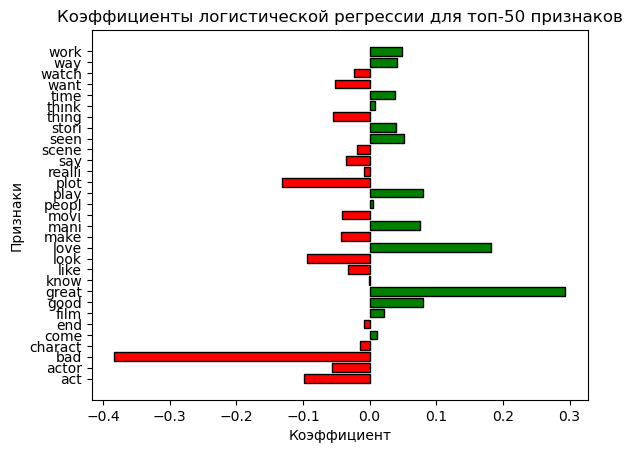

In [47]:
# Создаем горизонтальный столбчатый график, который показывает коэффициенты регрессии для топ-50 признаков
# Используем функцию barh для создания графика
# Передаем в качестве аргументов столбец word датафрейма df, который содержит названия признаков, и столбец coef, 
# который содержит значения коэффициентов регрессии
# Параметр color позволяет задать цвет столбцов в зависимости от знака коэффициента: зеленый для положительных и 
# красный для отрицательных
# Параметр edgecolor позволяет задать цвет границ столбцов
plt.barh(df["word"].head(50), df["coef"].head(50), color=["green" if x > 0 else "red" for x in df["coef"].head(50)], edgecolor="black")

# Добавляем заголовок графика с помощью функции title
plt.title("Коэффициенты логистической регрессии для топ-50 признаков")

# Добавляем подписи осей с помощью функций xlabel и ylabel
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")

# Показываем график
plt.show()


<h6 style= 'color: blue'>  Вывод по графику </h6> 

- График показывает, какие слова имеют наибольшее по модулю влияние на предсказание модели, и какой знак у этого влияния. Зеленые столбцы соответствуют словам, которые увеличивают вероятность принадлежности к положительному классу, а красные столбцы - словам, которые уменьшают эту вероятность.
- Самое влиятельное слово по модулю - это “bad”, которое имеет отрицательный коэффициент -0.383062. Это означает, что если отзыв содержит это слово, то вероятность того, что он положительный, сильно снижается. Это логично, так как слово “bad” обычно используется для выражения негативного отношения к фильму.
- Самое влиятельное слово с положительным знаком - это “great”, которое имеет коэффициент 0.293388. Это означает, что если отзыв содержит это слово, то вероятность того, что он положительный, сильно повышается. Это тоже логично, так как слово “great” обычно используется для выражения положительного отношения к фильму.
- В топ-50 признаков входят также слова “love”, “plot”, “act”, “look” и “actor”, которые имеют большой по модулю коэффициент. Это означает, что эти слова тоже сильно влияют на предсказание модели, но в разных направлениях. Слова “love”, “play”, “good” и “mani” имеют положительное влияние, 
- а слова “plot”, “act”, “look” и “actor” - отрицательное. Это может быть связано с тем, что эти слова часто используются для оценки разных аспектов фильма, таких как сюжет, актерская игра, внешний вид и т.д., и могут иметь разный окрас в зависимости от контекста и тональности отзыва.
- В топ-50 признаков также входят слова, которые имеют маленький по модулю коэффициент, например, “know”, “end”, “realli” и т.д. Это означает, что эти слова слабо влияют на предсказание модели, и могут быть не очень информативными для задачи классификации. Это может быть связано с тем, что эти слова часто используются в разных контекстах и не несут сильной эмоциональной окраски. От которых можно избавиться в последствии при новом обучении.

<h6 style= 'color: blue'> Общий вывод </h6>

- Результат логистической регрессии для задачи бинарной классификации текстовых отзывов на фильмы. 
- Модель предсказала, является ли отзыв положительным или отрицательным, на основе слов, которые в нем содержатся. 
- Мы использовали различные метрики качества, чтобы оценить, насколько хорошо модель справляется с задачей:
- Точность (accuracy) - это доля правильно предсказанных меток от общего числа меток. Модель имеет точность 0.6849, что означает, что она правильно предсказывает 68.49% отзывов. Это неплохой результат, но не идеальный. Это может быть связано с тем, что модель не учитывает контекст, тональность или сарказм в отзывах, а также с тем, что некоторые отзывы могут быть неоднозначными или смешанными.
- Площадь под кривой ROC (ROC AUC) - это мера, которая отражает, насколько хорошо модель разделяет классы, основываясь на вероятностях, которые она выдает. 
- ROC кривая - это график, который показывает зависимость доли верно классифицированных положительных объектов (TPR) от доли неверно классифицированных отрицательных объектов (FPR) при изменении порога вероятности, по которому мы относим объект к положительному классу. 
- Площадь под кривой ROC равна 1, если модель идеально разделяет классы, и равна 0.5, если модель не лучше случайного угадывания. Модель имеет площадь под кривой ROC 0.7519, что означает, что она достаточно хорошо разделяет классы, но не идеально. 
- Топ 50 признаков - это список слов, которые имеют наибольший по модулю коэффициент регрессии. Коэффициент регрессии - это вес, который модель присваивает каждому слову, чтобы получить линейную комбинацию слов. Чем больше по модулю коэффициент регрессии, тем больше влияние слова на предсказание модели. 
- Из графика мы можем сделать следующий вывод:
- Модель улавливает некоторые общие слова, которые часто используются для выражения положительного или отрицательного отношения к фильму, но не учитывает более специфические или необычные слова, которые также могут быть важными.
- Наша модель не учитывает контекст, тональность или сарказм в отзывах, а также не учитывает различия в сложности и длине отзывов, а также не учитывает противоречивые или неявные сигналы.

#### Возможные улучшения модели

- Модель может быть улучшена, если мы используем другие типы векторизации текста, которые учитывают не только частоту слов, но и их важность, контекст и порядок, а также если мы используем другие модели или комбинируем несколько моделей в одну.
- Точность - это одна из метрик качества, которая показывает, какая доля объектов была правильно предсказана моделью. Однако, точность не всегда является лучшей метрикой для оценки модели, особенно если данные несбалансированы, то есть один класс значительно превосходит другой по количеству объектов. В таком случае, модель может игнорировать меньший класс и предсказывать только больший класс, что приведет к высокой точности, но низкому качеству.
- Для того, чтобы увеличить точность и другие метрики качества, нам нужно улучшить модель. Это можно сделать разными способами, например:
- Подобрать оптимальные гиперпараметры модели, такие как коэффициент регуляризации, который контролирует сложность модели и предотвращает переобучение.
- Для этого мы можем использовать функции GridSearchCV или RandomizedSearchCV из модуля sklearn.model_selection, которые позволяют перебирать разные значения гиперпараметров и выбирать лучшие по заданной метрике качества.
- Преобразовать или отобрать признаки, которые используете для обучения модели. Некоторые признаки могут быть бесполезными или шумными для модели, поэтому их можно удалить или заменить на другие.
- Использовать другую модель или комбинировать несколько моделей в одну. 
- Логистическая регрессия - это одна из простых и популярных моделей для бинарной классификации, но она может быть неэффективной для сложных или нелинейных данных. 
- В таком случае, мы можете попробовать другие модели, такие как деревья решений, случайный лес, градиентный бустинг, нейронные сети и т.д.

In [48]:
# Сериализовать объект
import joblib
joblib.dump(model, 'LogisticRegression_model')

['LogisticRegression_model']

Спасибо за внимание!